![](portada-pydata.png)

# Introduction to Recommender Systems in Python

Recommender Systems analyze patterns of user interest in articles or products in order to provide personalized recommendations that satisfy their preferences.

In order to create a recommender system, different tasks must be performed.

Python has a large number of libraries that allow us and facilitate this:  

* Pandas: very powerful and flexible data analysis / manipulation tool;
* SciKit-Learn: SciKit library that provides data mining and machine learning techniques.
* SciKit-Surprise: SciKit library to test and evaluate different recommendation algorithms.
* Numpy: Scientific computer library with high-level mathematical functions to operate with vectors and matrices.
* Jupyter Notebook: Library that allows you to create and share documents that contain codes, equations, visualizations and texts.


In [4]:
print('Hello')

Hello


<div style="display:flex">
   <h2>Dataset that we will analyze: MovieLens movies with information provider by iMDB</h2>
   
</div>



* 5,000 movies. For each movie we have  title, genre, plot and revenue
* 270,000 users.
* 26,000,000 ratings (1,10)
* 750,000 keywords about movies


![](movies.png)


### Load data with Pandas

Pandas is the most powerful and flexible open source data analysis / manipulation tool. It provides fast, flexible and expressive data structures designed to work with relational or tagged data.

In [4]:
import pandas as pd
import json
import ast
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def load_movies_metadata(file_path):
    df = pd.read_csv(file_path, dtype='unicode')
    
    df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce').apply(lambda x: x.date())
    numeric_columns  = ['budget', 'vote_average','revenue','vote_count']
    for c in numeric_columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')
    
    # json columns
    json_columns = ['belongs_to_collection', 'genres', 'production_companies', 'production_countries', 'spoken_languages']
    for column in json_columns:
        # We use ast because json data have simple '' in the csv intead of "
        df[column] = df[column].apply(lambda x: np.nan if pd.isnull(x) else ast.literal_eval(x))
        
    
    return df

movies = load_movies_metadata('movies/movies_metadata.csv')


In [5]:
movies.head(4)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,{u'backdrop_path': u'/9FBwqcd9IRruEDUrTdcaafOM...,30000000.0,"[{u'id': 16, u'name': u'Animation'}, {u'id': 3...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{u'iso_639_1': u'en', u'name': u'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000.0,"[{u'id': 12, u'name': u'Adventure'}, {u'id': 1...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{u'iso_639_1': u'en', u'name': u'English'}, {...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,{u'backdrop_path': u'/hypTnLot2z8wpFS7qwsQHW1u...,0.0,"[{u'id': 10749, u'name': u'Romance'}, {u'id': ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{u'iso_639_1': u'en', u'name': u'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000.0,"[{u'id': 35, u'name': u'Comedy'}, {u'id': 18, ...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{u'iso_639_1': u'en', u'name': u'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0


In [6]:
movies['original_language'].unique()
#movies[movies['original_language']=='es']
#movies.groupby('original_language').size()

array(['en', 'fr', 'zh', 'it', 'fa', 'nl', 'de', 'cn', 'ar', 'es', 'ru',
       'sv', 'ja', 'ko', 'sr', 'bn', 'he', 'pt', 'wo', 'ro', 'hu', 'cy',
       'vi', 'cs', 'da', 'no', 'nb', 'pl', 'el', 'sh', 'xx', 'mk', 'bo',
       'ca', 'fi', 'th', 'sk', 'bs', 'hi', 'tr', 'is', 'ps', 'ab', 'eo',
       'ka', 'mn', 'bm', 'zu', 'uk', 'af', 'la', 'et', 'ku', 'fy', 'lv',
       'ta', 'sl', 'tl', 'ur', 'rw', 'id', 'bg', 'mr', 'lt', 'kk', 'ms',
       'sq', nan, '104.0', 'qu', 'te', 'am', 'jv', 'tg', 'ml', 'hr', 'lo',
       'ay', 'kn', 'eu', 'ne', 'pa', 'ky', 'gl', '68.0', 'uz', 'sm', 'mt',
       '82.0', 'hy', 'iu', 'lb', 'si'], dtype=object)

In [6]:
movies.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [10]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
adult                    45466 non-null object
belongs_to_collection    4494 non-null object
budget                   45463 non-null float64
genres                   45466 non-null object
homepage                 7782 non-null object
id                       45466 non-null object
imdb_id                  45449 non-null object
original_language        45455 non-null object
original_title           45466 non-null object
overview                 44512 non-null object
popularity               45461 non-null object
poster_path              45080 non-null object
production_companies     45463 non-null object
production_countries     45463 non-null object
release_date             45376 non-null object
revenue                  45460 non-null float64
runtime                  45203 non-null object
spoken_languages         45460 non-null object
status                   45379 non-null objec

In [7]:
genres = []
for i,row in movies.iterrows():
    if row['genres'] is not np.nan:
        a = row['genres']
        for item in a:
            if item['name'] not in genres:
                genres.append(item['name'])
print(genres)

['Animation', 'Comedy', 'Family', 'Adventure', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'History', 'Science Fiction', 'Mystery', 'War', 'Foreign', 'Music', 'Documentary', 'Western', 'TV Movie', 'Carousel Productions', 'Vision View Entertainment', 'Telescene Film Group Productions', 'Aniplex', 'GoHands', 'BROSTA TV', 'Mardock Scramble Production Committee', 'Sentai Filmworks', 'Odyssey Media', 'Pulser Productions', 'Rogue State', 'The Cartel']


Calculate the cinematographic genre that had the most revenue

In [9]:
genre_revenue = {}

for i in range(movies.shape[0]):
    for item in movies.iloc[i]['genres']:
        if 'name' in item and movies.iloc[i]['revenue'] >0:
            genre_name = item['name']
            b = int(movies.iloc[i]['revenue'])/1000000
            if genre_name in genre_revenue:
                genre_revenue[genre_name]['total_revenue'] += b 
            else:
                genre_revenue[genre_name] = {}
                genre_revenue[genre_name]['genre'] = genre_name
                genre_revenue[genre_name]['total_revenue'] = b

most_profitable_genre = pd.DataFrame(None,None,columns=['genre','revenue'])

for k,v in genre_revenue.items():
    most_profitable_genre =  most_profitable_genre.append({'genre':v['genre'],'revenue':v['total_revenue']},ignore_index=True)

In [10]:
most_profitable_genre = most_profitable_genre.sort_values(by='revenue',ascending=False)

In [14]:
most_profitable_genre.head()

,genre,revenue
13,Action,200726
11,Adventure,199616
15,Comedy,165797
6,Drama,159386
18,Thriller,129054


### Data Visualization

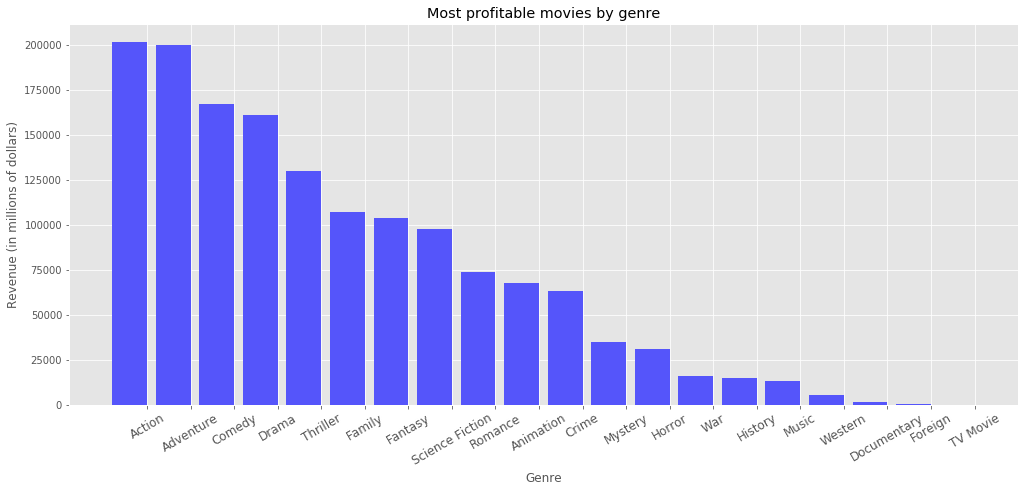

In [13]:
plt.style.use('ggplot')
plt.figure(figsize=(17,7))
number_of_genres= len(most_profitable_genre['genre'])
index = np.arange(number_of_genres)
bar_width = 0.8
plt.bar(index, most_profitable_genre['revenue'], bar_width, color='#5555FA' )
plt.gca().set_xlabel(u"Genre")
plt.gca().set_ylabel(u"Revenue (in millions of dollars)")
plt.xticks(index +bar_width/2, most_profitable_genre['genre'],rotation=30, fontsize=12)
plt.gca().set_title(u"Most profitable movies by genre")
plt.show()

We can also see the maximum number of votes for each genre

In [20]:
genre_vote_count = {}

for i,_ in movies.iterrows():   
    for item in movies.loc[i]['genres']:
        
        if 'name' in item and movies.loc[i]['vote_count'] >0:
            a = item['name']
            b = movies.loc[i]['vote_count']
            if a in genre_vote_count:
                genre_vote_count[a]['total_votes'] += b 
            else:
                genre_vote_count[a] = {}
                genre_vote_count[a]['genre'] = a
                genre_vote_count[a]['total_votes'] = b

most_votes_genre = pd.DataFrame(None,None,columns=['genre','total_votes'])

for k,v in genre_vote_count.items():
    most_votes_genre =  most_votes_genre.append({'genre':v['genre'],'total_votes':v['total_votes']},ignore_index=True)

In [19]:
most_votes_genre = most_votes_genre.sort_values(by='total_votes',ascending=False)
most_votes_genre.head()

,genre,total_votes
6,Drama,1956070.0
7,Action,1708508.0
1,Comedy,1438185.0
3,Adventure,1434576.0
9,Thriller,1434045.0


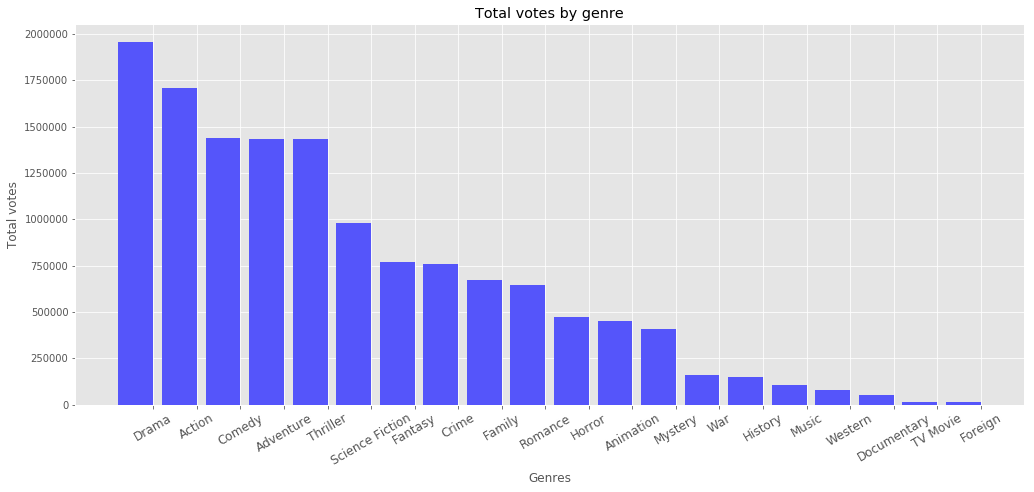

In [18]:
number_of_genres= len(most_votes_genre['genre'])
index = np.arange(number_of_genres)
bar_width = 0.8
plt.figure(figsize=(17,7))
plt.bar(index, most_votes_genre['total_votes'], bar_width, color='#5555FA' )
plt.gca().set_xlabel(u"Genre")
plt.gca().set_ylabel(u"Total votes")
plt.xticks(index +bar_width/2, most_votes_genre['genre'],rotation=30, fontsize=12)
plt.gca().set_title(u"Total votes by genre")
plt.xlabel(u"Genres")
plt.ylabel(u"Total votes")
plt.show()


#### Relation among ratings and revenues

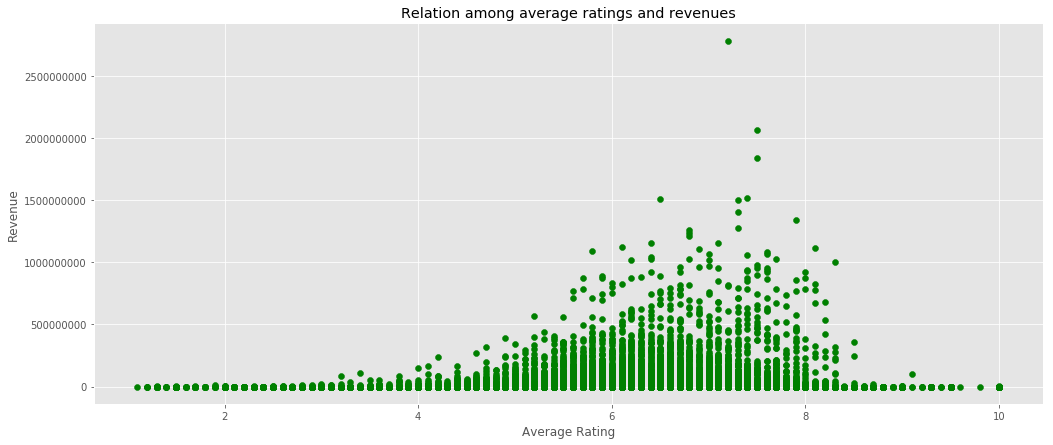

In [22]:
revenue_votes=movies[movies['vote_average']>1]
plt.figure(figsize=(17,7))
plt.scatter(revenue_votes['vote_average'],revenue_votes['revenue'], c='g', edgecolors='g', alpha=1)
plt.ylabel('Revenue')
plt.xlabel('Average Rating')
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.title(u'Relation among average ratings and revenues')

plt.show()

In [21]:
index=revenue_votes['revenue'].idxmax()
print(movies.loc[index]['title'])

Avatar


#### Ratings distribution

In [7]:
ratings=pd.read_csv('movies/ratings.csv')
ratings=ratings.groupby('rating').size().reset_index(name='count')
ratings.sort_values('count', ascending=False, inplace=True)
#ratings

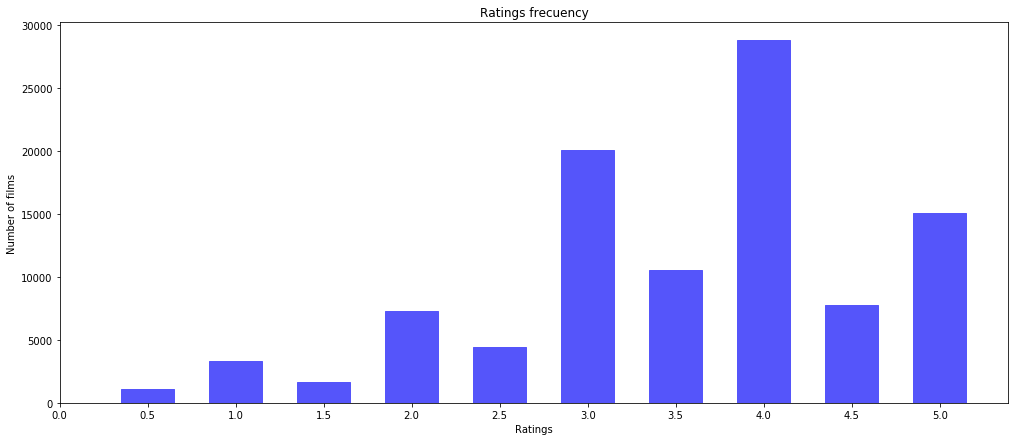

In [8]:
ratings.sort_values('rating', inplace=True)
index= np.arange(0.5,5.5,0.5)
plt.figure(figsize=(17,7))

plt.bar(index, ratings['count'], color='#5555FA', edgecolor='#5555FA', align='center', width=0.3)
plt.xlabel(u'Ratings')
plt.ylabel(u'Number of films')
plt.title(u'Ratings frecuency')

plt.xticks(np.arange(0,5.5,0.5))
plt.show()

#### Total of votes by movie

In [24]:
ratings=pd.read_csv('movies/ratings.csv')
media_rating = ratings['rating'].mean()
print (media_rating)

ratings=ratings.groupby('movieId').size().reset_index(name='count')    
ratings.sort_values('count', ascending=False, inplace=True)
#ratings[ratings['count']>1]



3.543608255669773


### Recommender system based on the content of the movies

Get better recommendations for the movie The Dark Knight, here known as "Batman: el caballero de la noche".

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

In [11]:
cv = CountVectorizer(analyzer='word', stop_words='english')
corpus =['i program in python', 'i love python', 'I program a lot']
example = cv.fit(corpus)
data= example.transform(corpus).todense()
pd.DataFrame(data=data,  index=corpus, columns=example.get_feature_names())

,lot,love,program,python
i program in python,0,0,1,1
i love python,0,1,0,1
I program a lot,1,0,1,0


In [27]:
movies['tagline'] = movies['tagline'].fillna('')
movies['description'] = movies['overview'] + movies['tagline']
movies['description'] = movies['description'].fillna('')

cv_matrix = cv.fit_transform(movies['description'])

##### Cosine similarity

In [28]:
from sklearn.metrics.pairwise import  cosine_similarity

film1_index = np.where(movies["title"] =="The Dark Knight")[0]
cv_vector_film_1 =cv_matrix[film1_index,:]
distances = cosine_similarity(cv_vector_film_1, cv_matrix)[0]
indices_of_most_simmilar_films = distances.argsort()[-15:-1]
movies.iloc[indices_of_most_simmilar_films]["title"]



585                                                 Batman
40974    LEGO DC Comics Super Heroes: Batman: Be-Leaguered
18009                               This Must Be the Place
41976                                The Lego Batman Movie
18035                                     Batman: Year One
20232              Batman: The Dark Knight Returns, Part 2
21194    Batman Unmasked: The Psychology of the Dark Kn...
26102                                       Going Straight
150                                         Batman Forever
28023                                      The Dead Season
15511                           Batman: Under the Red Hood
1328                                        Batman Returns
40658                                             Paranoia
18252                                The Dark Knight Rises
Name: title, dtype: object

### Using Recommender Systems with Surprise

In [5]:
from surprise import Reader, Dataset, KNNBasic, evaluate, accuracy
from surprise.model_selection import KFold

In [6]:
ratings=pd.read_csv('movies/ratings.csv')
#print(ratings.head())

In [7]:
# Reader specifies the scale of ratings.
reader = Reader(rating_scale=(0.5, 5))

# The columns must be: user id, item id, ratings, se debe respetar ese orden.
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)


![](sparse_matrix_sm.png)

### Colaborative filtering approach item-item

In [9]:
# Iterator for cross-validation
kf = KFold(n_splits=3)

sim_options = {'name': 'cosine',
               'user_based': False  # aproach item-item 
              }
        
algo = KNNBasic(sim_options=sim_options)

for trainset, testset in kf.split(data):

    # Fit and run the algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Evaluate the performance calculating RMSE error
    accuracy.rmse(predictions, verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9961
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9910
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9911


### Colaborative filtering approach user-user

In [20]:
# Iterator for cross-validation
kf = KFold(n_splits=3)

sim_options = {'name': 'pearson_baseline'}
        
algo = KNNBasic(sim_options=sim_options)

for trainset, testset in kf.split(data):

    # Fit and run the algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    
    # Evaluate the performance calculating RMSE error
    accuracy.rmse(predictions, verbose=True)
    accuracy.fcp(predictions, verbose=True)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0061
FCP:  0.6477
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0137
FCP:  0.6428
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0242
FCP:  0.6398


#### Predict a rating with this model

In [145]:
two_ratings = list(algo.trainset.all_ratings())[0:2]

uid = algo.trainset.to_raw_uid(two_ratings[0][0])  #user id 
iid = algo.trainset.to_raw_iid(two_ratings[1][1])  #item id 

# rating prediction for this user and this item.
pred = algo.predict(uid, iid,  verbose=True)

user: 631        item: 1584       r_ui = None   est = 3.79   {u'actual_k': 23, u'was_impossible': False}


### Kaggle

https://www.kaggle.com/

There are a lot of available datasets and notebooks with data analysis and recomendations.



### This notebook can be downloaded... 

https://github.com/mcharnelli/PyDataCordoba2018 

![](questions.jpg)

![](Thankyou.gif)

### Contact

https://www.linkedin.com/in/mar%C3%ADa-emilia-charnelli-385253160/

maria.emilia.charnelli@gmail.com